In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

## ARC Tour Data Cleaning

In [3]:
import pandas as pd

tour_df = pd.read_csv('indivTourData_1.csv')

,Lon,Lat,Number of Records,Dest Taz,End Period,Orig Taz,Start Period,Tour Category,Tour Id,Tour Mode,Tour Purpose
0,-84.431222,33.663345,1,1123,13:00,1137,13:00,AT_WORK,11,1,atwork_business
1,-84.350280,33.908791,1,1426,11:00,289,8:30,AT_WORK,11,1,atwork_business
2,-84.363082,33.939034,1,249,11:30,211,10:00,AT_WORK,11,1,atwork_business
3,-84.308173,33.816777,1,1535,10:00,1562,9:00,AT_WORK,11,1,atwork_business
4,-84.468353,33.880322,1,2363,13:30,2355,9:00,AT_WORK,11,1,atwork_business
5,-84.476211,33.869125,1,2328,12:00,2353,11:30,AT_WORK,11,1,atwork_business
6,-84.398026,33.768237,1,515,12:30,735,12:00,AT_WORK,11,1,atwork_business
7,-84.433868,33.734944,1,456,11:00,995,10:30,AT_WORK,11,1,atwork_business
8,-84.551403,33.984141,1,1971,12:30,2207,10:30,AT_WORK,11,1,atwork_business
9,-84.362757,33.791569,1,526,14:30,538,13:30,AT_WORK,11,1,atwork_business


In [7]:
tour_df.dropna(subset=['Lon','Lat'])

tour_df = tour_df[(tour_df['Tour Purpose'] == 'work_bluecollar') | (tour_df['Tour Purpose'] == 'work_whitecollar') | (tour_df['Tour Purpose'] == 'work_health') | (tour_df['Tour Purpose'] == 'work_retailandfood') | (tour_df['Tour Purpose'] == 'work_services')]

print("After dropping rows that contains NaN on 'Lon','Lat' column: ", poi_location_df.shape)
tour_df.head(10)

After dropping rows that contains NaN on 'Lon','Lat' column:  (1048575, 11)


,Lon,Lat,Number of Records,Dest Taz,End Period,Orig Taz,Start Period,Tour Category,Tour Mode,Tour Purpose
466,-84.415933,34.07898,1,2188,18:00,1,6:30,MANDATORY,3,work_whitecollar
471,-84.415933,34.07898,1,2275,20:00,1,9:00,MANDATORY,3,work_whitecollar
473,-84.415933,34.07898,1,2486,18:00,1,6:00,MANDATORY,2,work_services
480,-84.415933,34.07898,1,2400,19:30,1,8:00,MANDATORY,1,work_retailandfood
481,-84.415933,34.07898,1,2201,18:00,1,6:00,MANDATORY,3,work_bluecollar
483,-84.415933,34.07898,1,358,17:30,1,7:00,MANDATORY,12,work_retailandfood
484,-84.415933,34.07898,1,2338,22:30,1,20:30,MANDATORY,3,work_whitecollar
487,-84.415933,34.07898,1,2776,17:00,1,6:00,MANDATORY,1,work_services
489,-84.415933,34.07898,1,77,19:30,1,6:30,MANDATORY,1,work_whitecollar
491,-84.415933,34.07898,1,2264,17:00,1,9:30,MANDATORY,1,work_whitecollar


In [9]:
tour_morning = tour_df[(tour_df['Start Period'] == '8:00') | (tour_df['Start Period'] == '8:30') | (tour_df['Start Period'] == '9:00') | (tour_df['Start Period'] == '9:30') | (tour_df['Start Period'] == '10:00')] 
tour_afternoon = tour_df[(tour_df['Start Period'] == '16:00') | (tour_df['Start Period'] == '16:30') | (tour_df['Start Period'] == '17:00') | (tour_df['Start Period'] == '17:30') | (tour_df['Start Period'] == '18:00')] 

In [ ]:
# import folium
# import shapefile
# shape = shapefile.Reader("Model_Traffic_Analysis_Zones_2010.shp")
# ATL_COORD = [33.749, -84.388]
# map = folium.Map(location = ATL_COORD,
#                         zoom_start = 12,
#                 max_bounds=True,)
# j = 1
# for feat in shape:
#     feature = feat.shape.__geo_interface__
#     folium.GeoJson(
#             feature,
#             style_function=lambda feature: {
#                 'fillColor': "gray",
#                 'color' : "gray",
#                 'weight' : 1,
#                 'fillOpacity' : 0,
#                 }
#             ).add_to(map)
# map

In [10]:
print ("Morning Tours")
print ("Dataset shape (row, column): ", tour_morning.shape)
print ("Minimum Longitude: ", tour_morning['Lon'].min())
print ("Maximum Longitude: ", tour_morning['Lon'].max())
print ("Minimum Latitude: ", tour_morning['Lat'].min())
print ("Maximum Latitude: ", tour_morning['Lat'].max())
print ("Minimum Origin Taz: ", tour_morning['Orig Taz'].min())
print ("Maximum Origin Taz: ", tour_morning['Orig Taz'].max())


Morning Tours
Dataset shape (row, column):  (81127, 10)
Minimum Longitude:  -84.81621257
Maximum Longitude:  -83.97191887
Minimum Latitude:  33.51056498
Maximum Latitude:  34.17668513
Minimum Origin Taz:  1
Maximum Origin Taz:  2770


## Morning Tour Tunning Set

C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


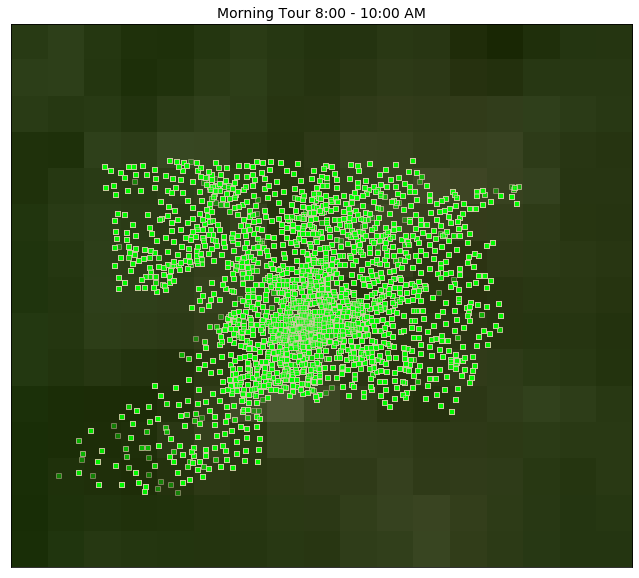

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-84.9
ulon=-83.8
llat=33.4
ulat=34.2

# selecting the boundaries of the map from lattitude and longitude 

tour_morning = tour_morning[(tour_morning['Lon'] > llon) & (tour_morning['Lon'] < ulon) & 
                        (tour_morning['Lat'] > llat) &(tour_morning['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(tour_morning.Lon), np.asarray(tour_morning.Lat))
tour_morning['xm']= xs.tolist()
tour_morning['ym'] =ys.tolist()

#Visualization1
for index,row in tour_morning.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 5, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Morning Tour 8:00 - 10:00 AM", fontsize=14)
# plt.savefig("morning_clusters.png", dpi=300)
plt.show()

In [16]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
tour_morning_clus_taz = tour_morning[['Lon', 'Lat', 'Orig Taz']]
tour_morning_clus_taz = StandardScaler().fit_transform(tour_morning_clus_taz)

db = DBSCAN(eps=0.2, min_samples=500).fit(tour_morning_clus_taz)
labels = db.labels_
print (labels[500:560])
tour_morning["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[-1  1  1  1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  0  0  0  1  1  1
  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  0  1  0  0 -1  1  1  1  1  1  1  1]


In [ ]:

"""Run k-means++ on test data and save output to image in same directory."""

from __future__ import division, print_function
from datetime import datetime
import numpy as np
import wkmeans as wkm
# If you base your code on this and put wkmeans in its own directory (called
# weighted_k_means, as would happen if you clone this repo) use the following
# to import instead:
# import weighted_k_means.wkmeans as wkm

startTime = datetime.now()

# Number of data points we want to generate:
# N = 5000
# Random counts because each data point is not unique and can even be "empty",
# i.e., have a count of zero:
# random_counts = np.random.randint(100, size=(N))  # integers for the counts
# random_counts = np.random.random_sample((N,)) * 100  # floats for the counts

# Initialise the class with some default values:
# wkmeans = wkm.KPlusPlus(3, N=N, c=random_counts, alpha=3, beta=0.9)

# If you have your own data use:
wkmeans = wkm.KPlusPlus(75, X=tour_morning_clus_taz, alpha=3, beta=0.9)

# Initialise centroids using k-means++...
wkmeans.init_centers()
# and run to find clusters:
wkmeans.find_centers(method='++')

# Now plot the result:
wkmeans.plot_clusters(wkmeans.plot_clusters.calls)

# We're done so print some useful info:
print('The End!')
print('\tRun time: ', datetime.now() - startTime)
print('\tTotal runs: ', wkmeans._cluster_points.calls)
print('\tNumber of unique items per cluster: ', [len(x) for x in
                                                 wkmeans.clusters])
print('\tNumber of items per cluster: ', wkmeans.counts_per_cluster)

C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ningg\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


Cluster 0, Average Longitude: -84.412329673126780, Average Latitude: 33.774668923310266
Cluster 1, Average Longitude: -84.254728691893581, Average Latitude: 33.79640674864408
Cluster 2, Average Longitude: -84.56602479471952, Average Latitude: 33.92728255159673
Cluster 3, Average Longitude: -84.573831521039033, Average Latitude: 33.58037996819598
Cluster 4, Average Longitude: -84.142836621889914, Average Latitude: 33.88105304588988
Cluster 5, Average Longitude: -84.08215523658775, Average Latitude: 33.94062131632552
Cluster 6, Average Longitude: -84.567878122651566, Average Latitude: 33.87008885614492
Cluster 7, Average Longitude: -84.045130977799747, Average Latitude: 33.781726666979914
Cluster 8, Average Longitude: -84.483599449622478, Average Latitude: 33.87487863900946
Cluster 9, Average Longitude: -84.47451257050979, Average Latitude: 33.91997321472542


Text(0.5, 1.0, 'Atlanta Taz Zone Clustered 8:00 - 10:00 AM: $ \\epsilon = 0.2$, min_samples = 15')

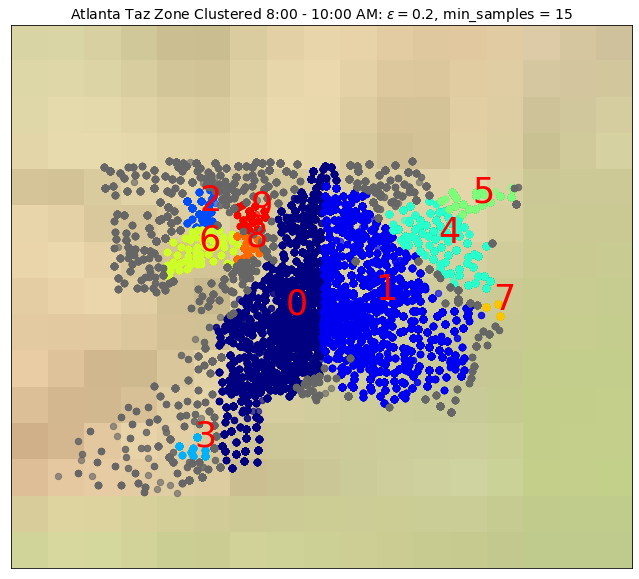

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = tour_morning[tour_morning.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=35, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.Lon))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.Lat)))
plt.title(r"Atlanta Taz Zone Clustered 8:00 - 10:00 AM: $ \epsilon = 0.2$, min_samples = 15", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

In [28]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
poi_830_clus_taz = poi_830[['F2', 'F3', 'Orig Taz']]
poi_830_clus_taz = StandardScaler().fit_transform(poi_830_clus_taz)

db = DBSCAN(eps=0.2, min_samples=70).fit(poi_830_clus_taz)
labels = db.labels_
print (labels[500:560])
poi_830["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Cluster 0, Average Longitude: -84.421913690009560, Average Latitude: 33.765506518704015
Cluster 1, Average Longitude: -84.25686841339371, Average Latitude: 33.796652651960514
Cluster 2, Average Longitude: -84.117656564050382, Average Latitude: 33.91913094286255
Cluster 3, Average Longitude: -84.546012291413593, Average Latitude: 33.90757821280529
Cluster 4, Average Longitude: -84.410232812987254, Average Latitude: 33.52124213271553
Cluster 5, Average Longitude: -84.189939649999975, Average Latitude: 33.99940611
Cluster 6, Average Longitude: -84.731436829311666, Average Latitude: 33.72806538284479
Cluster 7, Average Longitude: -84.147948252967477, Average Latitude: 33.515656661404265
Cluster 8, Average Longitude: -84.808829571390568, Average Latitude: 33.884811757808244
Cluster 9, Average Longitude: -84.739399357840149, Average Latitude: 33.384345258513186
Cluster 10, Average Longitude: -84.9433713368473510, Average Latitude: 33.73227444243916


Text(0.5, 1.0, 'Atlanta Taz Zone Clustered 8:30 AM: $ \\epsilon = 0.2$, min_samples = 70')

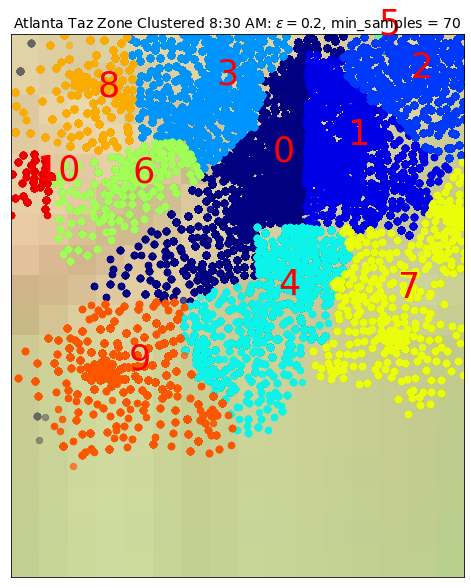

In [30]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_830[poi_830.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=35, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.F2))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.F3)))
plt.title(r"Atlanta Taz Zone Clustered 8:30 AM: $ \epsilon = 0.2$, min_samples = 70", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

In [39]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
poi_830_clus_taz = poi_830[['F2', 'F3', 'Orig Taz']]
poi_830_clus_taz = StandardScaler().fit_transform(poi_830_clus_taz)

db = DBSCAN(eps=0.2, min_samples=150).fit(poi_830_clus_taz)
labels = db.labels_
print (labels[500:560])
poi_830["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Cluster 0, Average Longitude: -84.421539447820750, Average Latitude: 33.76572188850304
Cluster 1, Average Longitude: -84.25686841339371, Average Latitude: 33.796652651960514
Cluster 2, Average Longitude: -84.117656564050382, Average Latitude: 33.91913094286255
Cluster 3, Average Longitude: -84.546012291413593, Average Latitude: 33.90757821280529
Cluster 4, Average Longitude: -84.41003213748734, Average Latitude: 33.52188384439788
Cluster 5, Average Longitude: -84.731436829311665, Average Latitude: 33.72806538284479
Cluster 6, Average Longitude: -84.147948252967476, Average Latitude: 33.515656661404265
Cluster 7, Average Longitude: -84.806497702150387, Average Latitude: 33.88384592179789
Cluster 8, Average Longitude: -84.737107588864938, Average Latitude: 33.38637102871082
Cluster 9, Average Longitude: -84.943371336847359, Average Latitude: 33.73227444243916


Text(0.5, 1.0, 'Atlanta Taz Zone Clustered 8:30 AM: $ \\epsilon = 0.2$, min_samples = 150')

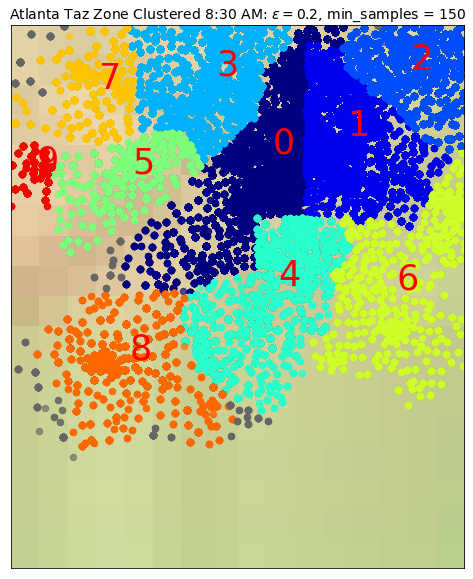

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_830[poi_830.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=35, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.F2))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.F3)))
plt.title(r"Atlanta Taz Zone Clustered 8:30 AM: $ \epsilon = 0.2$, min_samples = 150", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

In [41]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
poi_830_clus_taz = poi_830[['F2', 'F3', 'Orig Taz']]
poi_830_clus_taz = StandardScaler().fit_transform(poi_830_clus_taz)

db = DBSCAN(eps=0.18, min_samples=150).fit(poi_830_clus_taz)
labels = db.labels_
print (labels[1500:1560])
poi_830["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Cluster 0, Average Longitude: -84.421414581477020, Average Latitude: 33.76580677233492
Cluster 1, Average Longitude: -84.25686841339371, Average Latitude: 33.796652651960514
Cluster 2, Average Longitude: -84.117656564050382, Average Latitude: 33.91913094286255
Cluster 3, Average Longitude: -84.546012291413593, Average Latitude: 33.90757821280529
Cluster 4, Average Longitude: -84.410022159968424, Average Latitude: 33.52220423917565
Cluster 5, Average Longitude: -84.731436829311665, Average Latitude: 33.72806538284479
Cluster 6, Average Longitude: -84.147948252967476, Average Latitude: 33.515656661404265
Cluster 7, Average Longitude: -84.80292949592217, Average Latitude: 33.8848903425008
Cluster 8, Average Longitude: -84.735440653566538, Average Latitude: 33.39041940666727
Cluster 9, Average Longitude: -84.943027990345029, Average Latitude: 33.732672991981076
Cluster 10, Average Longitude: -84.8210009245454610, Average Latitude: 33.25663643993506
Cluster 11, Average Longitude: -84.772307

Text(0.5, 1.0, 'Atlanta Taz Zone Clustered 8:30 AM: $ \\epsilon = 0.18$, min_samples = 150')

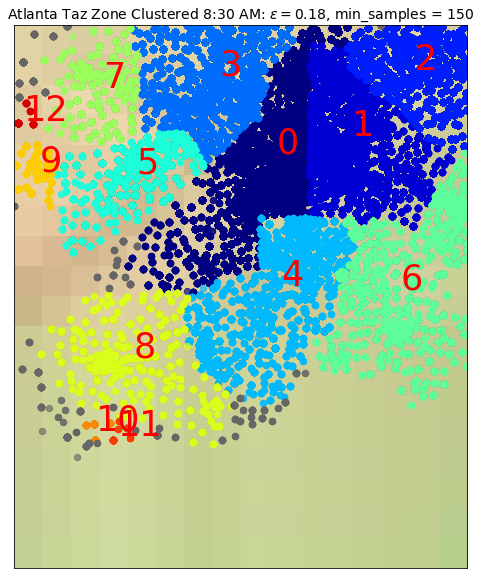

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_830[poi_830.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=35, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.F2))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.F3)))
plt.title(r"Atlanta Taz Zone Clustered 8:30 AM: $ \epsilon = 0.18$, min_samples = 150", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

Tuned epsilon: 0.0125

In [132]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
poi_830_clus_taz = poi_830[['F2', 'F3', 'Orig Taz']]
poi_830_clus_taz = StandardScaler().fit_transform(poi_830_clus_taz)

db = DBSCAN(eps=0.013, min_samples=60).fit(poi_830_clus_taz)
labels = db.labels_
print (labels[1500:1560])
poi_830["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[-1 -1 12 -1 12 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Cluster 0, Average Longitude: -84.316262349999990, Average Latitude: 33.82767568999999
Cluster 1, Average Longitude: -84.334038419999981, Average Latitude: 33.92643255000001
Cluster 2, Average Longitude: -84.386856028519092, Average Latitude: 33.753360580510666
Cluster 3, Average Longitude: -84.329258043, Average Latitude: 33.796342960000004
Cluster 4, Average Longitude: -84.38760635859054, Average Latitude: 33.76196380728941
Cluster 5, Average Longitude: -84.442407869999985, Average Latitude: 33.98647344
Cluster 6, Average Longitude: -84.519029536, Average Latitude: 33.93538213
Cluster 7, Average Longitude: -84.219327580000017, Average Latitude: 33.96120829
Cluster 8, Average Longitude: -84.397435579999988, Average Latitude: 33.77496890999999
Cluster 9, Average Longitude: -84.202020089999999, Average Latitude: 33.89002749000001
Cluster 10, Average Longitude: -84.3651015710, Average Latitude: 33.98509797999999
Cluster 11, Average Longitude: -84.4386262599999911, Average Latitude: 33.63

Cluster 98, Average Longitude: -84.0056778199999998, Average Latitude: 33.93762504
Cluster 99, Average Longitude: -84.0583449199999899, Average Latitude: 33.78568274999999
Cluster 100, Average Longitude: -84.20534703100, Average Latitude: 33.49779770999999
Cluster 101, Average Longitude: -84.03368749000003101, Average Latitude: 33.9489556
Cluster 102, Average Longitude: -84.03123744102, Average Latitude: 33.87625412


Text(0.5, 1.0, 'Atlanta Taz Zone Clustered 8:30 AM: $ \\epsilon = 0.125$, min_samples = 100')

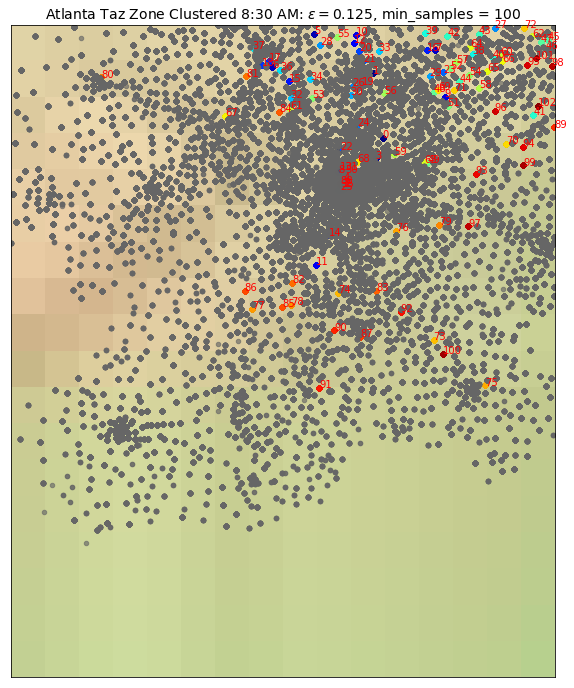

In [133]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (16,12)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_830[poi_830.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=10, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.F2))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.F3)))
plt.title(r"Atlanta Taz Zone Clustered 8:30 AM: $ \epsilon = 0.125$, min_samples = 100", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

7:30 Example

In [5]:
poi_730 = poi_location_df.loc[poi_location_df['depart_period'] == '7:30 am']

In [7]:
print ("7:30 AM")
print ("Dataset shape (row, column): ", poi_730.shape)
print ("Minimum Longitude: ", poi_730['F2'].min())
print ("Maximum Longitude: ", poi_730['F2'].max())
print ("Minimum Latitude: ", poi_730['F3'].min())
print ("Maximum Latitude: ", poi_730['F3'].max())
print ("Minimum Origin Taz: ", poi_730['Orig Taz'].min())
print ("Maximum Origin Taz: ", poi_730['Orig Taz'].max())

7:30 AM
Dataset shape (row, column):  (893717, 19)
Minimum Longitude:  -85.16169308
Maximum Longitude:  -83.81063904
Minimum Latitude:  33.20629839
Maximum Latitude:  34.399904600000006
Minimum Origin Taz:  1
Maximum Origin Taz:  4999


In [5]:
poi_730_e = poi_730[['F2', 'F3']].values.tolist()
#poi_730_e

In [9]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(poi_730_e)
distances_730, indices = nbrs.kneighbors(poi_730_e)
distances_730, indices

(array([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[838220,  50114],
        [ 65878, 499411],
        [837840, 814297],
        ...,
        [408694, 402155],
        [ 70400,  89207],
        [893431, 537841]], dtype=int64))

In [10]:
distances_730 = np.sort(distances, axis=0)
distances_730
# distances = distances[:,1]
# plt.plot(distances)

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.        , 0.01983639],
       [0.        , 0.020609  ],
       [0.        , 0.02325749]])

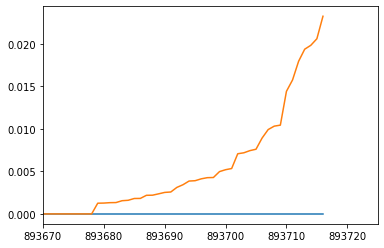

In [21]:
plt.xlim([893670,893725])
plt.plot(distances_730)
#thus epsilon should be at the turning point (0.0125)

# we want to get around 100 clusters, so we need min_samples = 4767

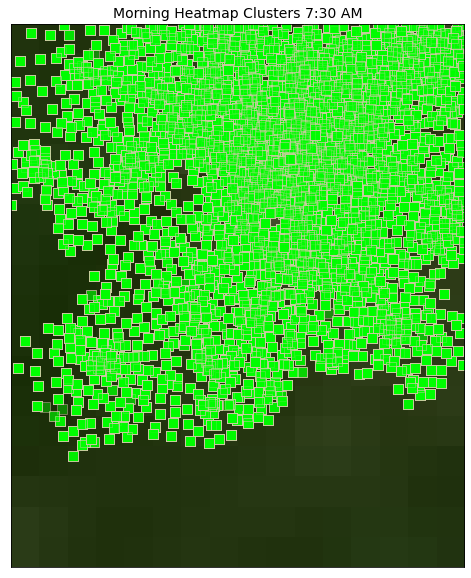

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-85
ulon=-84
llat=33
ulat=34

# selecting the boundaries of the map from lattitude and longitude 

poi_730 = poi_730[(poi_730['F2'] > llon) & (poi_730['F2'] < ulon) & 
                        (poi_730['F3'] > llat) &(poi_730['F3'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(poi_730.F2), np.asarray(poi_730.F3))
poi_730['xm']= xs.tolist()
poi_730['ym'] =ys.tolist()

#Visualization1
for index,row in poi_730.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Morning Heatmap Clusters 7:30 AM", fontsize=14)
# plt.savefig("morning_clusters.png", dpi=300)
plt.show()

In [7]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
poi_730_clus_taz = poi_730[['F2', 'F3', 'Orig Taz']]
poi_730_clus_taz = StandardScaler().fit_transform(poi_730_clus_taz)

db = DBSCAN(eps=0.01, min_samples=650).fit(poi_730_clus_taz)
labels = db.labels_
print (labels[1500:1560])
poi_730["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[ 5 -1 -1 -1  6 -1  6  5  5 -1 -1  6  6 -1 -1 -1  6  6 -1 -1  6  5 -1 -1
  5 -1 -1 -1 -1 -1  5 -1  5 -1 -1 -1 -1 -1  5 -1 -1 -1 -1 -1 -1  5 -1  5
  6  6  6  5 -1 -1 -1 -1 -1 -1 -1  5]


Cluster 0, Average Longitude: -84.323652580000020, Average Latitude: 33.96100842999999
Cluster 1, Average Longitude: -84.110395049999981, Average Latitude: 33.99597154000001
Cluster 2, Average Longitude: -84.237522279999982, Average Latitude: 33.987312949999996
Cluster 3, Average Longitude: -84.334038419999983, Average Latitude: 33.92643255
Cluster 4, Average Longitude: -84.485322080000024, Average Latitude: 33.88935936
Cluster 5, Average Longitude: -84.368420229999975, Average Latitude: 33.973223080000004
Cluster 6, Average Longitude: -84.383169029999996, Average Latitude: 33.94876283
Cluster 7, Average Longitude: -84.329258047, Average Latitude: 33.79634296
Cluster 8, Average Longitude: -84.371629930000018, Average Latitude: 33.90681508
Cluster 9, Average Longitude: -84.388521014773649, Average Latitude: 33.754228509412236
Cluster 10, Average Longitude: -84.4494784199999910, Average Latitude: 33.917205149999994
Cluster 11, Average Longitude: -84.4424078711, Average Latitude: 33.98647

Text(0.5, 1.0, 'Atlanta Taz Zone Clustered 7:30 AM: $ \\epsilon = 0.01$, min_samples = 650')

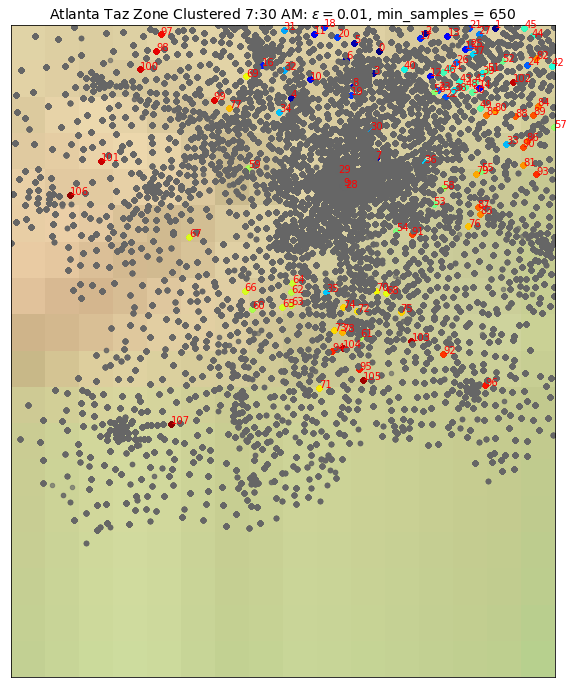

In [16]:
import csv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (16,12)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

cenx_list = []
ceny_list = []
cluster = []
counter = 0
#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_730[poi_730.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        cenx_list.append(np.mean(clust_set.F2))
        ceny_list.append(np.mean(clust_set.F3))
        cluster.append(str(counter))
        counter += 1
        plt.text(cenx,ceny,str(clust_number), fontsize=10, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.F2))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.F3)))
        
    with open('density_center_730.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["Lon", "Lat", "Cluster"])
        writer.writerows(zip(cenx_list, ceny_list, cluster))
plt.title(r"Atlanta Taz Zone Clustered 7:30 AM: $ \epsilon = 0.01$, min_samples = 650", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

# with open('density_center.csv', 'w') as f:
#     writer = csv.writer(f)
#     writer.writerows(zip(cenx_list, ceny_list))

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (16,12)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))


#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = poi_730[poi_730.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=10, color='red',)
        print ("Cluster "+str(clust_number)+', Average Longitude: '+ str(np.mean(clust_set.F2))+str(clust_number)+', Average Latitude: '+ str(np.mean(clust_set.F3)))
plt.title(r"Atlanta Taz Zone Clustered 7:30 AM: $ \epsilon = 0.01$, min_samples = 610", fontsize=14)        
#plt.savefig("etopo_cluster.png", dpi=300)

10:00 AM Example

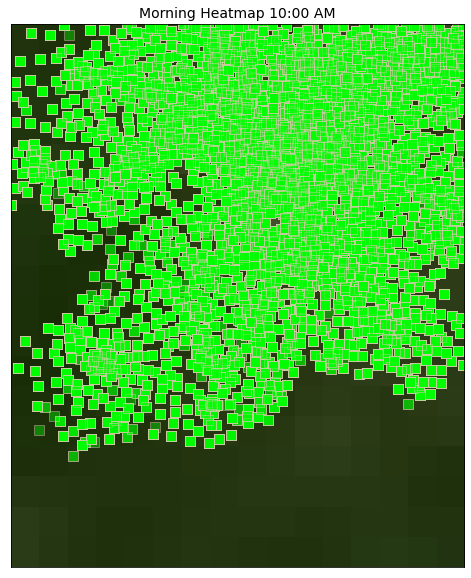

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-85
ulon=-84
llat=33
ulat=34

# selecting the boundaries of the map from lattitude and longitude 

poi_1000 = poi_1000[(poi_1000['F2'] > llon) & (poi_1000['F2'] < ulon) & 
                        (poi_1000['F3'] > llat) &(poi_1000['F3'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
my_map.bluemarble()
# To collect data based on stations        

xs,ys = my_map(np.asarray(poi_1000.F2), np.asarray(poi_1000.F3))
poi_1000['xm']= xs.tolist()
poi_1000['ym'] =ys.tolist()

#Visualization1
for index,row in poi_1000.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
#plt.text(x,y,stn)
plt.title("Morning Heatmap 10:00 AM", fontsize=14)
# plt.savefig("morning_clusters.png", dpi=300)
plt.show()